## Task:

The following excerpt is from the work sample prompt: <br>

>Review the data set, and draw any conclusions you can find from the data set. Try to identify the most popular scooter location, demonstrate your findings using data visualization tools, calculate operation time cost (Operation Time Cost: How long it takes to fully charge all the scooters), and come up with the most efficient scooter charging strategy. 



### Imports

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize']= (12,7)

### Basic exploration

In [8]:
df = pd.read_csv('xtern_dataset.csv')
df.shape

(25668, 4)

In [9]:
df.head()

,scooter_id,xcoordinate,ycoordinate,power_level
0,0,0.906835,0.776484,0
1,1,0.928587,0.804964,2
2,2,0.904091,0.784043,1
3,3,0.906752,0.804461,0
4,4,0.900641,0.781683,4


In [10]:
df.describe()

,scooter_id,xcoordinate,ycoordinate,power_level
count,25668.000000,25668.000000,25668.000000,25668.000000
mean,12833.500000,0.491567,0.437083,2.496065
std,7409.857691,0.474552,0.515695,1.719245
min,0.000000,-0.300062,-0.290196,0.000000
25%,6416.750000,0.211375,-0.025581,1.000000
50%,12833.500000,0.403102,0.312886,2.000000
75%,19250.250000,0.929187,0.883513,4.000000
max,25667.000000,1.369517,1.357176,5.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25668 entries, 0 to 25667
Data columns (total 4 columns):
scooter_id     25668 non-null int64
xcoordinate    25668 non-null float64
ycoordinate    25668 non-null float64
power_level    25668 non-null int64
dtypes: float64(2), int64(2)
memory usage: 802.2 KB


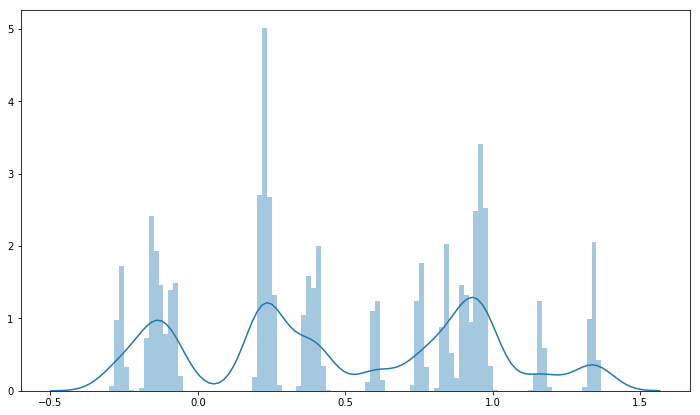

In [40]:
sns.distplot(tuple(df['xcoordinate']), bins = 100);

---
In the next cell, we plot the distribution of ycoordinates. Note that a good portion of the data is centered around $y =0$, <br> whereas another cluster seems to exist at around $y=.75$.


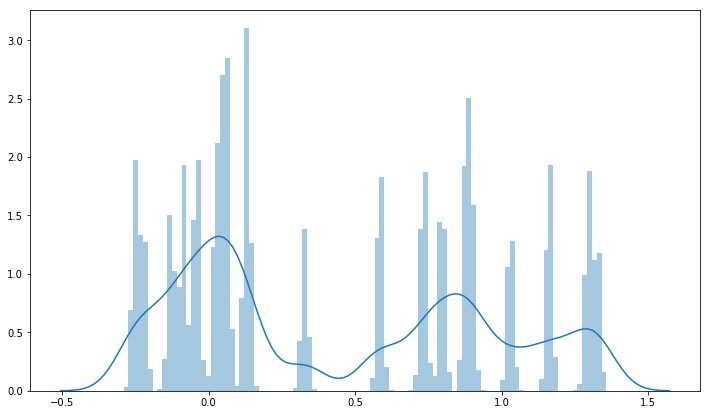

In [14]:
sns.distplot(tuple(df['ycoordinate']), bins = 100);

---
As shown in the plot below, the distribution of power level among scooters is approximately uniform. <br> Even so, level 3 is slightly less likely than any other level.


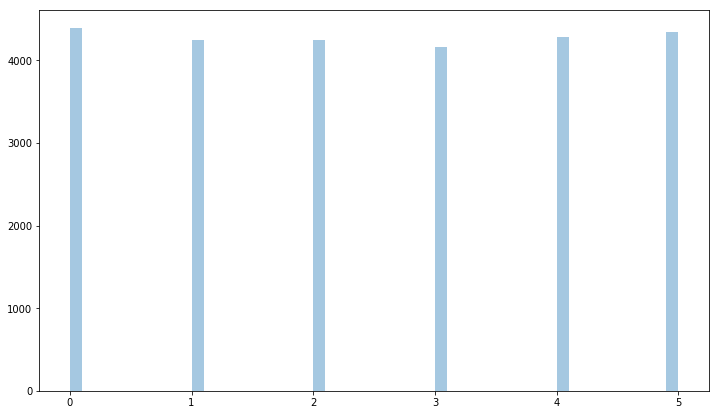

In [15]:
sns.distplot(tuple(df['power_level']), bins = 50, kde = False);

In [184]:
#sns.scatterplot(x = df['xcoordinate'], y= df['power_level']);

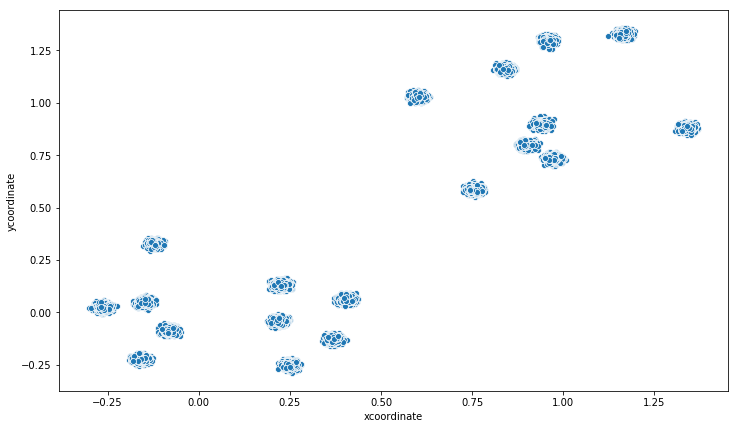

In [167]:
sns.scatterplot(x = df['xcoordinate'], y = df['ycoordinate']);

In [185]:
print('-'*65)
print('number of points in the cluster below x = .5:', df[df['xcoordinate'] < .5].shape[0])
print('-'*65)
print('number of points in the cluster above x = .5:', df[df['xcoordinate'] >=.5].shape[0])

-----------------------------------------------------------------
number of points in the cluster below x = .5: 13732
-----------------------------------------------------------------
number of points in the cluster above x = .5: 11936


Some general notes that I observed from the above analysis:
- There seem to be two main groups of scooters, one above $x=.5$ and one below $x=.5$
- There's more data in the group below $x=.5$, though not by a large amount
- There are two subgroups in the group of scooters below $x=.5$ ; a group with $x>0$, and the other with $x<0$

### Further exploration - finding the location with the most scooters

In [16]:
cluster_11 = df[(df['xcoordinate'] >= .7) & (df['xcoordinate'] <= .75) & (df['ycoordinate'] >= .5) & (df['ycoordinate'] <= .6)]
 

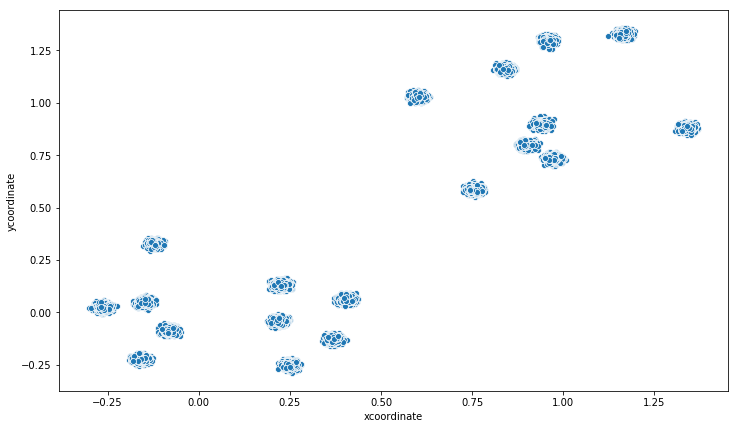

In [17]:
sns.scatterplot(x = df['xcoordinate'], y = df['ycoordinate']);

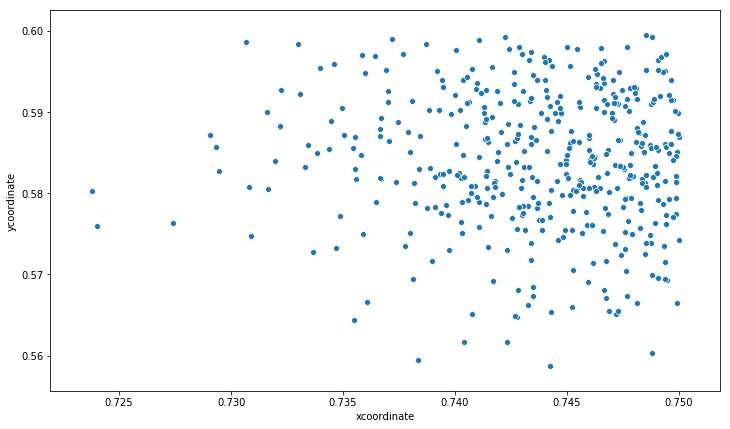

In [18]:
sns.scatterplot(x=cluster_11['xcoordinate'], y=cluster_11['ycoordinate']);


It looks like we cut off some of the cluster we were trying to examine, so lets reset our boundaries and try again.

---

In [19]:
cluster_11 = df[(df['xcoordinate'] >= .7) & (df['xcoordinate'] <= .81) & (df['ycoordinate'] >= .5) & (df['ycoordinate'] <= .9)]
#cluster_11.head()
cluster_11.shape

(1461, 4)

In [20]:
cluster_dict = {'cluster_11': cluster_11.shape[0]}
cluster_dict

{'cluster_11': 1461}

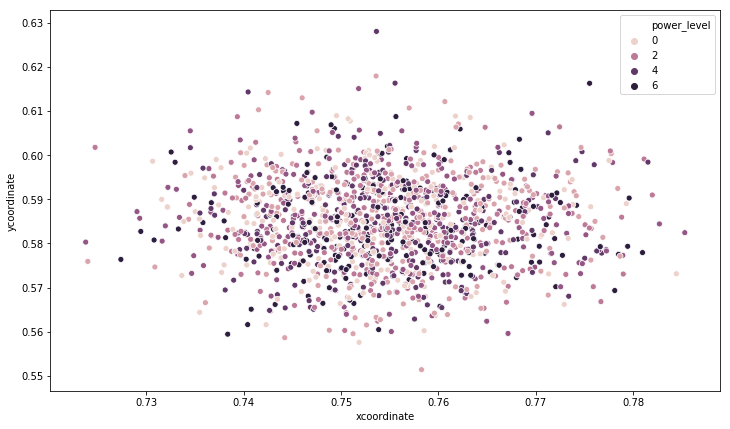

In [21]:
sns.scatterplot(x=cluster_11['xcoordinate'], y=cluster_11['ycoordinate'], hue = cluster_11['power_level']);

---
We want to be able to find the most popular scooter location; unfortunately, this means  repeating the above work for <br> each of the 19 clusters. So, lets write some functions!

In [22]:
def filter_cluster(xlb, xub, ylb, yub):
    """
    params:
    xlb - x lower bound; int
    xub - x upper bound; int
    ylb - y lower bound; int
    yub - y upper bound; int
    
    returns: 
    dataframe containing only data within the specified bounds

    """
    
    
    cluster =  df[(df['xcoordinate'] >= xlb) & (df['xcoordinate'] <= xub) & (df['ycoordinate'] >= ylb) & (df['ycoordinate'] <= yub)]
    return cluster
    

In [23]:
def plot_cluster(cluster_name):
    """
    params:
    cluster_name - name of cluster we want to plot
    
    returns:
    plot of each point, colored by power level
    
    """
    
    sns.scatterplot(x=cluster_name['xcoordinate'], y=cluster_name['ycoordinate'], hue = cluster_name['power_level']);
    
    return
    

In [24]:
test = filter_cluster(.7, .81, .5, .9)

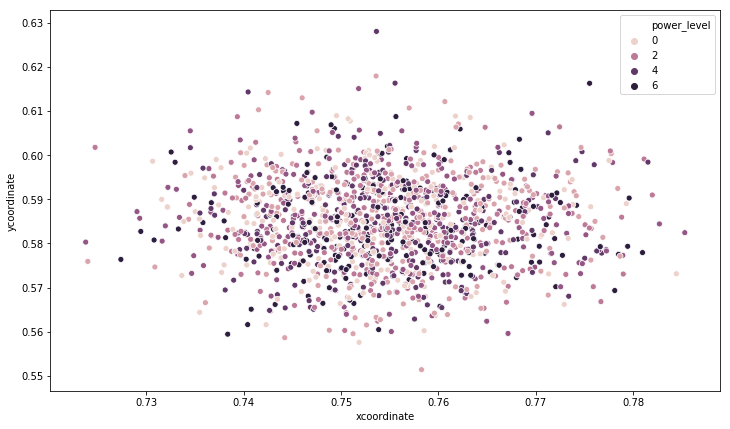

In [25]:
plot_cluster(test)

This is the graph we found earlier - clearly the functions work as intended.

In [27]:
cluster_1 = filter_cluster(-.3, 0, .25, .5) 

In [28]:
cluster_1.shape

(971, 4)

In [152]:
cluster_dict['cluster_1'] = 971
#cluster_dict

In [144]:
#plot_cluster(cluster_1)

In [32]:
cluster_2 = filter_cluster(-.35, -.2, -.2, .5) 

In [33]:
cluster_2.shape

(1333, 4)

In [34]:
cluster_dict['cluster_2'] = 1333
cluster_dict

{'cluster_11': 1461, 'cluster_1': 971, 'cluster_2': 1333}

In [145]:
#plot_cluster(cluster_2)

In [149]:
cluster_3 = filter_cluster(-.21, -.1, -.05, .25)
#plot_cluster(cluster_3)
cluster_dict['cluster_3'] = cluster_3.shape[0]
#cluster_dict

In [46]:
cluster_4 = filter_cluster(-.18,0,-.175,-.05)

In [48]:
cluster_4.shape

(1367, 4)

In [148]:
cluster_dict['cluster_4'] =1367
#cluster_dict

In [146]:
#plot_cluster(cluster_4)

In [52]:
cluster_5 = filter_cluster(-.2,-.1, -.3,-.17)

In [55]:
cluster_5.shape

(988, 4)

In [153]:
cluster_dict['cluster_5'] = 988
#cluster_dict

In [147]:
#plot_cluster(cluster_5)

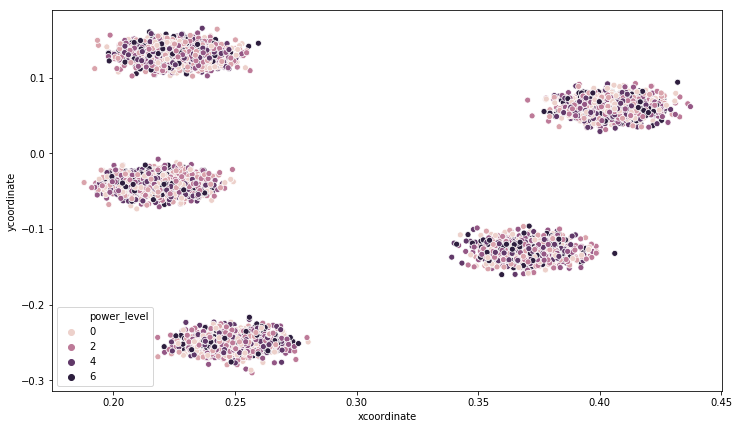

In [140]:
second_cluster = df[(df['xcoordinate'] >= 0) & (df['xcoordinate'] <= .5)]
#second_cluster.head()
sns.scatterplot(x = second_cluster['xcoordinate'],
                y =second_cluster['ycoordinate'],
                hue = second_cluster['power_level']);

In [154]:
cluster_6 = filter_cluster(.2,.3, -.3,-.2 )
#plot_cluster(cluster_6)
cluster_dict['cluster_6'] = cluster_6.shape[0]
#cluster_dict

In [155]:
cluster_7 = filter_cluster(.15, .26, -.1,0)
#plot_cluster(cluster_7)
cluster_dict['cluster_7'] = cluster_7.shape[0]
#cluster_dict

In [156]:
cluster_8 = filter_cluster(.1,.3, 0.05, .2)
#plot_cluster(cluster_8)
cluster_dict['cluster_8'] = cluster_8.shape[0]
#cluster_dict

In [157]:
cluster_9 = filter_cluster(.3,.42, -.2, -.05)
#plot_cluster(cluster_9)
cluster_dict['cluster_9'] = cluster_9.shape[0]
#cluster_dict

In [158]:
cluster_10 = filter_cluster(.35,.45, 0,1)
#plot_cluster(cluster_10)
cluster_dict['cluster_10'] = cluster_10.shape[0]
#cluster_dict

In [141]:
#sns.scatterplot(x=df['xcoordinate'], y=df['ycoordinate']);

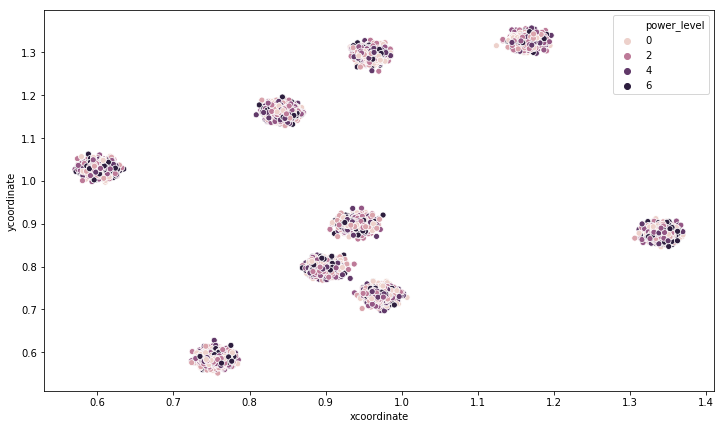

In [88]:
third_cluster = df[df['xcoordinate'] >= .5]
sns.scatterplot(x = third_cluster['xcoordinate'],
                y = third_cluster['ycoordinate'],
                hue = third_cluster['power_level']);

In [159]:
cluster_12 = filter_cluster(.84, .95, .76, .84)
#plot_cluster(cluster_12)
cluster_dict['cluster_12'] = cluster_12.shape[0]
#cluster_dict

In [160]:
cluster_13 = filter_cluster(.94, 1.05, .65, .8)
#plot_cluster(cluster_13)
cluster_dict['cluster_13'] = cluster_13.shape[0]
#cluster_dict

In [161]:
cluster_14 = filter_cluster(.87, .98, .84, .94)
#plot_cluster(cluster_14)
cluster_dict['cluster_14'] = cluster_14.shape[0]
#cluster_dict

In [162]:
cluster_15 = filter_cluster(.5, .7, .95, 1.1)
#plot_cluster(cluster_15)
cluster_dict['cluster_15'] = cluster_15.shape[0]
#cluster_dict

In [163]:
cluster_16 = filter_cluster(.78, .88, 1.1, 1.2)
#plot_cluster(cluster_16)
cluster_dict['cluster_16'] = cluster_16.shape[0]
#cluster_dict

In [164]:
cluster_17 = filter_cluster(.9, 1, 1.2, 1.35)
#plot_cluster(cluster_17)
cluster_dict['cluster_17'] = cluster_17.shape[0]
#cluster_dict

In [165]:
cluster_18 = filter_cluster(1.1, 1.2, 1.2, 1.4)
#plot_cluster(cluster_18)
cluster_dict['cluster_18'] = cluster_18.shape[0]
#cluster_dict

In [166]:
cluster_19 = filter_cluster(1.3, 1.4, .8, .95)
#plot_cluster(cluster_19)
cluster_dict['cluster_19'] = cluster_19.shape[0]
cluster_dict

{'cluster_11': 1461,
 'cluster_1': 971,
 'cluster_2': 1333,
 'cluster_3': 1154,
 'cluster_4': 1367,
 'cluster_5': 988,
 'cluster_6': 1334,
 'cluster_7': 1603,
 'cluster_8': 2205,
 'cluster_9': 1219,
 'cluster_12': 1313,
 'cluster_10': 1558,
 'cluster_13': 1539,
 'cluster_14': 1219,
 'cluster_15': 1115,
 'cluster_16': 1491,
 'cluster_17': 1366,
 'cluster_18': 914,
 'cluster_19': 1517}

Let's do a sanity check to see whether our analysis is consistent:

In [127]:
df.shape

(25668, 4)

In [139]:
sum(cluster_dict.values())

25667

In [143]:
cluster_dict

{'cluster_11': 1461,
 'cluster_1': 971,
 'cluster_2': 1333,
 'cluster_3': 1154,
 'cluster_4': 1367,
 'cluster_5': 988,
 'cluster_6': 1334,
 'cluster_7': 1603,
 'cluster_8': 2205,
 'cluster_9': 1219,
 'cluster_12': 1313,
 'cluster_10': 1558,
 'cluster_13': 1539,
 'cluster_14': 1219,
 'cluster_15': 1115,
 'cluster_16': 1491,
 'cluster_17': 1366,
 'cluster_18': 914,
 'cluster_19': 1517}

Well, unfortunately we missed a point. Luckily, this doesn't change which cluster has the most scooters - it's cluster 8 by a large margin.

---

### Calculating operation time cost
First off, let's get some simplifying assumptions out of the way.

- Since it takes 5 hours to charge a scooter's power from 0 to 5, I assume the time scales linearly with power level; i.e. a scooter at level 3 will take 2 hours to charge
- Our mega charging bus is really big - there's no limit to the number of scooters we can hold
- The time to obtain specific scooters is a small constant; if our x and y coordinates are in scale of miles, then all the scooters are very close together, and this isn't too unreasonable.  

In [239]:
seconds = (df.shape[0]) * 5
hours = seconds/(60*60)
hours

35.65

In [ ]:
sqrt(a^2 + b^2)

In [256]:
starting_distance = np.sqrt((20.19-1.25) ** 2 + (20.19-.75)**2)
initial_delay = starting_distance / 50
initial_delay

0.5428212228717666

In [257]:
35.65+.543

36.193

Taking into consideration how far the bus starts from all of our points, we have to add in the time it takes to get to the first cluster of scooters. This is simply .54 hours, so our estimate becomes 36.2 hours.

Depending on the power level of the last scooter we pick up, the operation time cost ranges from 41.2 hours (power level 0) to 36.2 (power level 5). Of course, this is a bad approximation and really only serves as an upper bound.

---

### Charging Strategy

Assuming that the bus is very large, then our charging strategy should be as follows: drive to the cluster in the upper right corner, since the bus starts our closest to this cluster. Then, pick up every scooter in the cluster. Repeat this for all other clusters in this order: start at 19, then go to - 18, 17, 16, 15, 14, 12, 13, 11, 10, 9, 8, 7, 6, 4, 5, 3, 2, 1.

Our strategry could change for a variety of reasons - if we assume the scooters need to be dropped off where they were picked up or at some central location, we might charge all scooters within a cluster then drop them off there. If our bus can't hold more than, say, 1000 scooters, we would need to take into account the charging time necessary for each batch of 1000. If we want to ensure dead scooters are minimized in conjunction with assuming our bus space is finite, we might choose to pick up only scooters at power level 0.